In [25]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#avoid warning messages
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA)

In [26]:
# read dataset from a public Google Drive File

file_link = '/content/drive/MyDrive/CSE427/Lab Assigment-3/plant_growth_data - plant_growth_data.csv'

# # get the id part of the file
# id = file_link.split("/")[-2]

# # creating a new link using the id for better readability of csv file in pandas
# new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(file_link)

# let's look at the first few instances
df.head()


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [27]:
df.shape

(193, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   192 non-null    object 
 3   Fertilizer_Type   192 non-null    object 
 4   Temperature       183 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [29]:
df.describe(include='all')

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,191.000000,192,192,183.000000,191.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,73,74,NaN,NaN,NaN
mean,NaN,6.814887,NaN,NaN,25.017731,58.086350,0.497409
std,NaN,1.603823,NaN,NaN,5.363576,12.696306,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.464666,NaN,NaN,20.599339,49.056490,0.000000
50%,NaN,6.832000,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.252072,NaN,NaN,29.496670,69.150000,1.000000


In [30]:
df.nunique()

,0
Soil_Type,3
Sunlight_Hours,188
Water_Frequency,3
Fertilizer_Type,3
Temperature,180
Humidity,189
Growth_Milestone,2


In [31]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,1
Fertilizer_Type,1
Temperature,10
Humidity,2
Growth_Milestone,0


In [32]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


Growth_Milestone
0    97
1    96
Name: count, dtype: int64


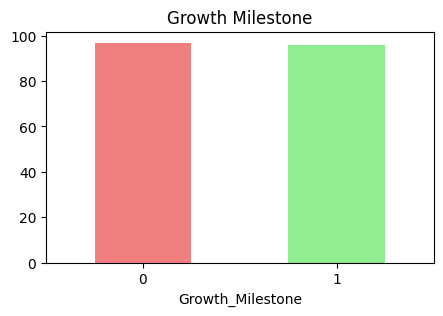

In [33]:
# Visualize the distribution of the 'Growth_Milestone' variable

print(df.value_counts('Growth_Milestone'))

plt.figure(figsize=(5, 3))
df['Growth_Milestone'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Growth Milestone')
# plt.xlabel('Rained')
# plt.ylabel('Days count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

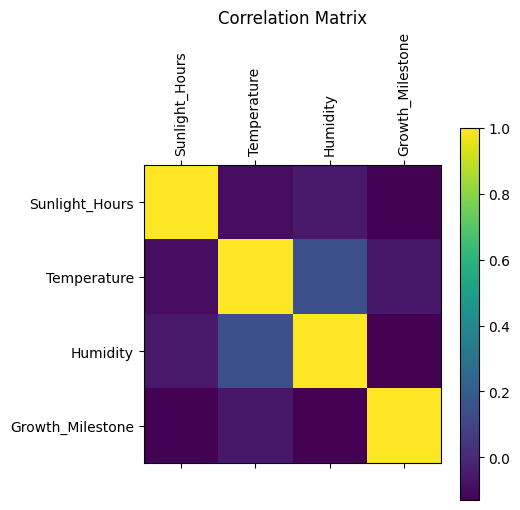

In [34]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Prepocessing

In [35]:
#drop duplicates
df = df.drop_duplicates()
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [36]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [37]:
# Drop rows with missing values
df.dropna(subset=['Sunlight_Hours', 'Temperature', 'Humidity','Growth_Milestone'], inplace=True)
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
...,...,...,...,...,...,...,...
187,loam,6.127000,bi-weekly,organic,22.100000,55.700000,1
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0


In [38]:
# Fill missing values in numerical features with column's mean value   #Need to use inplace tool so that the original dataset is changed
numerical_cols = ['Sunlight_Hours', 'Temperature', 'Humidity']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
...,...,...,...,...,...,...,...
187,loam,6.127000,bi-weekly,organic,22.100000,55.700000,1
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0


In [39]:
df.shape

(179, 7)

In [40]:
#check for total null value for each feature
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,1
Fertilizer_Type,1
Temperature,0
Humidity,0
Growth_Milestone,0


In [41]:
#check for categorical and numerical variables in df
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


In [42]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])
df.isnull().sum()
df.shape

(179, 13)

# Implementing AdaBoost using Scikit-learn Library

In [43]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['Growth_Milestone'], axis=1)
# df['RainTomorrow']= df['RainTomorrow'].replace(0, -1)
y = df['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (143, 12)
X_test shape: (36, 12)
y_train shape: (143,)
y_test shape: (36,)


In [45]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.734
Accuracy score (validation): 0.583


In [46]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.895
Accuracy score (validation): 0.583


In [47]:

n_estms = [5, 10, 15]
lrates = [0.1, 0.3, 0.4]
for val1 in lrates:
  for val2 in n_estms:
    abc = AdaBoostClassifier(n_estimators=val2,learning_rate=val1, random_state = 42)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # plot_adaboost(X, y, model)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))
    print(f"Learning rate:{val1} and estimator is {val2}")
    print("===================================")

Accuracy score (training): 0.706
Accuracy score (validation): 0.583
Learning rate:0.1 and estimator is 5
Accuracy score (training): 0.706
Accuracy score (validation): 0.583
Learning rate:0.1 and estimator is 10
Accuracy score (training): 0.706
Accuracy score (validation): 0.583
Learning rate:0.1 and estimator is 15
Accuracy score (training): 0.706
Accuracy score (validation): 0.583
Learning rate:0.3 and estimator is 5
Accuracy score (training): 0.720
Accuracy score (validation): 0.583
Learning rate:0.3 and estimator is 10
Accuracy score (training): 0.727
Accuracy score (validation): 0.611
Learning rate:0.3 and estimator is 15
Accuracy score (training): 0.706
Accuracy score (validation): 0.583
Learning rate:0.4 and estimator is 5
Accuracy score (training): 0.769
Accuracy score (validation): 0.611
Learning rate:0.4 and estimator is 10
Accuracy score (training): 0.748
Accuracy score (validation): 0.667
Learning rate:0.4 and estimator is 15
